In [1]:
using NCDatasets, PyPlot, AvailablePotentialEnergyFramework, Statistics, PyCall, LaTeXStrings, Unitful, JLD

In [2]:
tkr = pyimport("matplotlib.ticker")# import FormatStrFormatter
#from matplotlib.colors import DivergingNorm
c = pyimport("matplotlib.colors")

PyObject <module 'matplotlib.colors' from '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/matplotlib/colors.py'>

In [3]:
PyPlot.matplotlib.__version__

"3.1.1"

In [4]:
data_dir = "/global/cscratch1/sd/aramreye/for_postprocessing/CompositeOutputs_50d_9hpa_checkingInteraction/"
output_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"

"/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"

In [5]:
file_list_nomask = ["f5e-4_2km_1000km_control_nomask.jld"
"f5e-4_2km_1000km_homoRad_homoSfc_nomask.jld"
"f5e-4_2km_1000km_homoRad_nomask.jld"
"f5e-4_2km_1000km_homoSfc_nomask.jld"]
file_list_withmask = ["f5e-4_2km_1000km_control_withmask.jld"
"f5e-4_2km_1000km_homoRad_homoSfc_withmask.jld"
"f5e-4_2km_1000km_homoRad_withmask.jld"
"f5e-4_2km_1000km_homoSfc_withmask.jld"]

4-element Array{String,1}:
 "f5e-4_2km_1000km_control_withmask.jld"
 "f5e-4_2km_1000km_homoRad_homoSfc_withmask.jld"
 "f5e-4_2km_1000km_homoRad_withmask.jld"
 "f5e-4_2km_1000km_homoSfc_withmask.jld"

In [6]:
control_withmask_composite =  load(string(data_dir,"f5e-4_2km_1000km_control_withmask.jld"))
control_nomask_composite =  load(string(data_dir,"f5e-4_2km_1000km_control_nomask.jld"))
homoSfc_withmask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoSfc_withmask.jld"))
homoSfc_nomask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoSfc_nomask.jld"))
homoRad_withmask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoRad_withmask.jld"))
homoRad_nomask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoRad_nomask.jld"))
homoAll_withmask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_withmask.jld"))
homoAll_nomask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_nomask.jld"))

Dict{String,Any} with 17 entries:
  "W"                      => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ;…
  "LHF"                    => Float32[116.426 116.426 … 116.426 116.426; 116.42…
  "V"                      => Float32[0.262151 0.330834 … 0.222891 0.246164; 0.…
  "QRAD"                   => Float32[-1.54948 -1.54948 … -1.54948 -1.54948; -1…
  "PW"                     => Float32[45.073 45.0976 … 45.0895 45.0738; 45.107 …
  "USFC"                   => Float32[-0.6047 -0.604707 … -0.586771 -0.566934; …
  "PSFC"                   => Float32[1001.09 1001.09 … 1001.07 1001.08; 1001.1…
  "PP"                     => Float32[-149.554 -148.72 … -151.356 -150.449; -14…
  "QV"                     => Float32[17.2424 17.2662 … 17.2379 17.2461; 17.249…
  "Prec"                   => Float32[4.83068 4.96832 … 4.20037 4.16078; 4.5020…
  "convec_heating_anomaly" => Float32[-2.26617f-7 4.45233f-7 … -3.67672f-7 8.84…
  "VSFC"                   => Float32[0.262297 0.331158 … 0.222852 0.246337

In [7]:
radiusbins = 1000:2000:512000;
length(radiusbins)

256

In [8]:
function get_tangential_and_radial_speed(composite)
    tangential = similar(composite["V"])
    radial = similar(composite["V"]);
    for index in CartesianIndices(tangential)
        center = (256,256)
        index_of_point = (index[1],index[2])
        tangential[index],radial[index] = AvailablePotentialEnergyFramework.velocity_cartesian_to_polar(composite["U"][index],composite["V"][index],index_of_point,center)
    end
    return tangential,radial
end

function get_azimuthal_average(array :: Array{T,3},radiusbins) where T
    azimuthalaverage = zeros(eltype(array),length(radiusbins) - 1,size(array,3));
    for rindex in 1:(length(radiusbins) - 1)
        azimuthalaverage[rindex,:] .= AvailablePotentialEnergyFramework.averageallindistance((radiusbins[rindex],radiusbins[rindex+1]),array,(256,256),2000.0)   
    end
    return azimuthalaverage
end

function get_azimuthal_average(array :: Array{T,2},radiusbins) where T
    azimuthalaverage = zeros(eltype(array),length(radiusbins) - 1);
    for rindex in 1:(length(radiusbins) - 1)
        azimuthalaverage[rindex] = AvailablePotentialEnergyFramework.averageallindistance((radiusbins[rindex],radiusbins[rindex+1]),array,(256,256),2000.0)   
    end
    return azimuthalaverage
end

get_azimuthal_average (generic function with 2 methods)

In [9]:

tpert_control_nomask = get_azimuthal_average(1u"K" .* control_nomask_composite["TABS"],radiusbins)
tpert_homoRad_nomask = get_azimuthal_average(1u"K" .* homoRad_nomask_composite["TABS"],radiusbins)
tpert_homoSfc_nomask = get_azimuthal_average(1u"K" .* homoSfc_nomask_composite["TABS"],radiusbins)
tpert_homoAll_nomask = get_azimuthal_average(1u"K" .* homoAll_nomask_composite["TABS"],radiusbins)

surfu_control_nomask = 1u"m/s" .* hypot.(control_nomask_composite["USFC"],control_nomask_composite["VSFC"])
surfu_homoRad_nomask = 1u"m/s" .* hypot.(homoRad_nomask_composite["USFC"],homoRad_nomask_composite["VSFC"])
surfu_homoSfc_nomask = 1u"m/s" .* hypot.(homoSfc_nomask_composite["USFC"],homoSfc_nomask_composite["VSFC"])
surfu_homoAll_nomask = 1u"m/s" .* hypot.(homoAll_nomask_composite["USFC"],homoAll_nomask_composite["VSFC"])

averagespeed_control_nomask = get_azimuthal_average(surfu_control_nomask,radiusbins)
averagespeed_homoRad_nomask = get_azimuthal_average(surfu_homoRad_nomask,radiusbins)
averagespeed_homoSfc_nomask = get_azimuthal_average(surfu_homoSfc_nomask,radiusbins)
averagespeed_homoAll_nomask = get_azimuthal_average(surfu_homoAll_nomask,radiusbins)

surfpres_control_nomask = 1u"hPa" .* control_nomask_composite["PSFC"]
surfpres_homoRad_nomask = 1u"hPa" .* homoRad_nomask_composite["PSFC"]
surfpres_homoSfc_nomask = 1u"hPa" .* homoSfc_nomask_composite["PSFC"]
surfpres_homoAll_nomask = 1u"hPa" .* homoAll_nomask_composite["PSFC"]

averagepres_control_nomask = get_azimuthal_average(surfpres_control_nomask,radiusbins)
averagepres_homoRad_nomask = get_azimuthal_average(surfpres_homoRad_nomask,radiusbins)
averagepres_homoSfc_nomask = get_azimuthal_average(surfpres_homoSfc_nomask,radiusbins)
averagepres_homoAll_nomask = get_azimuthal_average(surfpres_homoAll_nomask,radiusbins)

qv_control_nomask = get_azimuthal_average(1e-3u"kg/g" * 1u"g/kg" .* control_nomask_composite["QV"],radiusbins)
qv_homoRad_nomask = get_azimuthal_average(1e-3u"kg/g" * 1u"g/kg" .* homoRad_nomask_composite["QV"],radiusbins)
qv_homoSfc_nomask = get_azimuthal_average(1e-3u"kg/g" * 1u"g/kg" .* homoSfc_nomask_composite["QV"],radiusbins)
qv_homoAll_nomask = get_azimuthal_average(1e-3u"kg/g" * 1u"g/kg" .* homoAll_nomask_composite["QV"],radiusbins)


tangential_control_nomask, radial_control_nomask = get_azimuthal_average(get_tangential_and_radial_speed(control_nomask_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(control_nomask_composite)[2],radiusbins)
tangential_homoRad_nomask, radial_homoRad_nomask = get_azimuthal_average(get_tangential_and_radial_speed(homoRad_nomask_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(homoRad_nomask_composite)[2],radiusbins)
tangential_homoSfc_nomask, radial_homoSfc_nomask = get_azimuthal_average(get_tangential_and_radial_speed(homoSfc_nomask_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(homoSfc_nomask_composite)[2],radiusbins)
tangential_homoAll_nomask, radial_homoAll_nomask = get_azimuthal_average(get_tangential_and_radial_speed(homoAll_nomask_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(homoAll_nomask_composite)[2],radiusbins);


In [10]:
z_grd = [50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1178.57142857143 1385.71428571429 1671.42857142857 2035.71428571429 2478.57142857143 3000 3600 4200 4800 5400 6000 6600 7200 7800 8400 9000 9600 10200 10800 11400 12000 12600 13200 13800 14400 15000 15600 16200 16800 17400 18000 18600 19200 19800 20400 21000 21600 22200 22800 23400 24000 24600 25200 25800 26400 27000 27600 28200 28800 29400 30000 30600 31200 31800 32400 33000 33600 34200 34800];
x = 1e-3collect(range(0,step=2000,length=255))
y = x
z_iter = 3:56;
x_iter = 2:100

2:100

In [11]:
tropopause_control = 15600 #m
tropopause_homoRad = 16600
tropopause_homoSfc = 15000
tropopause_homoAll = 14000

14000

In [12]:
tropopause_control_idx = findmin(abs.(z_grd .- tropopause_control))[2][2] #km
tropopause_homoRad_idx = findmin(abs.(z_grd .- tropopause_homoRad))[2][2]
tropopause_homoSfc_idx = findmin(abs.(z_grd .- tropopause_homoSfc))[2][2]
tropopause_homoAll_idx = findmin(abs.(z_grd .- tropopause_homoAll))[2][2]

45

In [13]:
index_rmw_control = findmax(tangential_control_nomask[:,1])[2]
index_rmw_homoRad = findmax(tangential_homoRad_nomask[:,1])[2]
index_rmw_homoSfc = findmax(tangential_homoSfc_nomask[:,1])[2]
index_rmw_homoAll = findmax(tangential_homoAll_nomask[:,1])[2]

12

In [14]:
r_control = specific_humidity_to_mixing_ratio.(qv_control_nomask)
r_homoRad = specific_humidity_to_mixing_ratio.(qv_homoRad_nomask)
r_homoSfc = specific_humidity_to_mixing_ratio.(qv_homoSfc_nomask)
r_homoAll = specific_humidity_to_mixing_ratio.(qv_homoAll_nomask);

In [33]:
saturation_e_at_surface_all = get_saturation_vapor_pressure(300.0)

35.34519666889136

In [36]:
function get_saturation_mixing_ratio(temperature,pressure)
   return epsilon*ustrip(get_saturation_vapor_pressure(temperature))/(pressure - ustrip(get_saturation_vapor_pressure(temperature)))
end

get_saturation_mixing_ratio (generic function with 1 method)

In [43]:
@show outflow_temp_control = ustrip(mean(tpert_control_nomask[:,tropopause_control_idx]))
@show outflow_temp_homoRad = ustrip(mean(tpert_homoRad_nomask[:,tropopause_homoRad_idx]))
@show outflow_temp_homoSfc = ustrip(mean(tpert_homoSfc_nomask[:,tropopause_homoSfc_idx]))
@show outflow_temp_homoAll = ustrip(mean(tpert_homoAll_nomask[:,tropopause_homoAll_idx]))

outflow_temp_control = ustrip(mean(tpert_control_nomask[:, tropopause_control_idx])) = 200.36613f0
outflow_temp_homoRad = ustrip(mean(tpert_homoRad_nomask[:, tropopause_homoRad_idx])) = 194.95447f0
outflow_temp_homoSfc = ustrip(mean(tpert_homoSfc_nomask[:, tropopause_homoSfc_idx])) = 198.10823f0
outflow_temp_homoAll = ustrip(mean(tpert_homoAll_nomask[:, tropopause_homoAll_idx])) = 201.62991f0


201.62991f0

In [41]:
saturation_mixing_ratio_control = get_saturation_mixing_ratio(300.0,ustrip(averagepres_control_nomask[index_rmw_control]))
saturation_mixing_ratio_homoRad = get_saturation_mixing_ratio(300.0,ustrip(averagepres_homoRad_nomask[index_rmw_homoRad]))
saturation_mixing_ratio_homoSfc = get_saturation_mixing_ratio(300.0,ustrip(averagepres_homoSfc_nomask[index_rmw_homoSfc]))
saturation_mixing_ratio_homoAll = get_saturation_mixing_ratio(300.0,ustrip(averagepres_homoAll_nomask[index_rmw_homoAll]))

0.023200357111081947

In [19]:
function get_specific_enthalpy(temperature,mixing_ratio)
    return Dryair.cp*temperature + mixing_ratio*Liquidwater.cp*temperature + Liquidwater.Lv*mixing_ratio 
end

get_specific_enthalpy (generic function with 1 method)

In [45]:
@show kb_control = get_specific_enthalpy(ustrip(tpert_control_nomask[index_rmw_control,1]),r_control[index_rmw_control,1])
@show kb_homoRad = get_specific_enthalpy(ustrip(tpert_homoRad_nomask[index_rmw_homoRad,1]),r_control[index_rmw_homoRad,1])
@show kb_homoSfc = get_specific_enthalpy(ustrip(tpert_homoSfc_nomask[index_rmw_homoSfc,1]),r_control[index_rmw_homoSfc,1])
@show kb_homoAll = get_specific_enthalpy(ustrip(tpert_homoAll_nomask[index_rmw_homoAll,1]),r_control[index_rmw_homoAll,1])

kb_control = get_specific_enthalpy(ustrip(tpert_control_nomask[index_rmw_control, 1]), r_control[index_rmw_control, 1]) = 380767.99203563726
kb_homoRad = get_specific_enthalpy(ustrip(tpert_homoRad_nomask[index_rmw_homoRad, 1]), r_control[index_rmw_homoRad, 1]) = 383309.77759800525
kb_homoSfc = get_specific_enthalpy(ustrip(tpert_homoSfc_nomask[index_rmw_homoSfc, 1]), r_control[index_rmw_homoSfc, 1]) = 379293.3992052928
kb_homoAll = get_specific_enthalpy(ustrip(tpert_homoAll_nomask[index_rmw_homoAll, 1]), r_control[index_rmw_homoAll, 1]) = 381257.74612000317


381257.74612000317

In [47]:
@show kstar_control = get_specific_enthalpy(300.0,saturation_mixing_ratio_control)
@show kstar_homoRad = get_specific_enthalpy(300.0,saturation_mixing_ratio_homoRad)
@show kstar_homoSfc = get_specific_enthalpy(300.0,saturation_mixing_ratio_homoSfc)
@show kstar_homoAll = get_specific_enthalpy(300.0,saturation_mixing_ratio_homoAll)

kstar_control = get_specific_enthalpy(300.0, saturation_mixing_ratio_control) = 390117.2624732129
kstar_homoRad = get_specific_enthalpy(300.0, saturation_mixing_ratio_homoRad) = 390867.3937420631
kstar_homoSfc = get_specific_enthalpy(300.0, saturation_mixing_ratio_homoSfc) = 389045.3127938458
kstar_homoAll = get_specific_enthalpy(300.0, saturation_mixing_ratio_homoAll) = 389033.34273766814


389033.34273766814

formula for PI:
    
    epsi = (Ts - Tout) / Tout
    
    v^2 = Ck/Cd * epsi * Ts(K*s - kb) with k specific enthalpy

In [22]:
function get_potential_intensity(sst,tout,kb,kstar,ck = 0.9,cd = 1)
    v2 = (ck/cd) * ((sst - tout)/tout)  * (kstar - kb)
    return sqrt(v2)
end

get_potential_intensity (generic function with 3 methods)

In [50]:
@show vmax_control = get_potential_intensity(300.0,outflow_temp_control,kb_control,kstar_control)
@show vmax_homoRad = get_potential_intensity(300.0,outflow_temp_homoRad,kb_control,kstar_homoRad)
@show vmax_homoSfc = get_potential_intensity(300.0,outflow_temp_homoSfc,kb_control,kstar_homoSfc)
@show vmax_homoAll = get_potential_intensity(300.0,outflow_temp_homoAll,kb_control,kstar_homoAll)

vmax_control = get_potential_intensity(300.0, outflow_temp_control, kb_control, kstar_control) = 64.68468172037925
vmax_homoRad = get_potential_intensity(300.0, outflow_temp_homoRad, kb_control, kstar_homoRad) = 69.98279359665472
vmax_homoSfc = get_potential_intensity(300.0, outflow_temp_homoSfc, kb_control, kstar_homoSfc) = 61.899114999261606
vmax_homoAll = get_potential_intensity(300.0, outflow_temp_homoAll, kb_control, kstar_homoAll) = 60.24291010453204


60.24291010453204

In [24]:
large_data_dir = "$(ENV["SCRATCH"])/for_postprocessing/largencfiles/"
function get_timeseries!(buf1,buf2,buf3,file_path)
 	(min_pres,max_speed) = Dataset(file_path) do ds
        NCDatasets.load!(ds["PSFC"].var,buf1,:,:,:)
        min_pres = dropdims(minimum(buf1,dims=(1,2)),dims=(1,2))
        NCDatasets.load!(ds["USFC"].var,buf1,:,:,:)
        NCDatasets.load!(ds["VSFC"].var,buf2,:,:,:)
        #pres = variable(ds,"PSFC")[:,:,:] :: Array{Float32,3}
        #u = variable(ds,"USFC")[:,:,:] :: Array{Float32,3}
        #v = variable(ds,"VSFC")[:,:,:] :: Array{Float32,3}
        buf3 .= hypot.(buf1,buf2)
        #min_pres = dropdims(minimum(pres,dims=(1,2)),dims=(1,2))
        max_speed = dropdims(maximum(buf3,dims=(1,2)),dims=(1,2))
        (min_pres,max_speed)
    end
    return (min_pres,max_speed)
end

get_timeseries! (generic function with 1 method)

In [25]:
buf1_large = Array{Float32,3}(undef,512,512,2400)
buf2_large = Array{Float32,3}(undef,512,512,2400)
buf3_large = Array{Float32,3}(undef,512,512,2400)

buf1_small = Array{Float32,3}(undef,512,512,1200)
buf2_small = Array{Float32,3}(undef,512,512,1200)
buf3_small = Array{Float32,3}(undef,512,512,1200);

In [26]:
pres_control,sp_control = get_timeseries!(buf1_large,buf2_large,buf3_large,joinpath(large_data_dir,"f5e-4_2km_1000km_control_2d.nc"))
pres_homoSfc,sp_homoSfc = get_timeseries!(buf1_large,buf2_large,buf3_large,joinpath(large_data_dir,"f5e-4_2km_1000km_homoSfc_2d.nc"))
pres_homoRad,sp_homoRad = get_timeseries!(buf1_large,buf2_large,buf3_large,joinpath(large_data_dir,"f5e-4_2km_1000km_homoRad_2d.nc"))
pres_homoRad_homoSfc,sp_homoRad_homoSfc = get_timeseries!(buf1_large,buf2_large,buf3_large,joinpath(large_data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_2d.nc"))

(Float32[1002.4053, 1002.3763, 1002.3768, 1002.3826, 1002.3848, 1002.3809, 1002.3838, 1002.3885, 1002.3896, 1002.3885  …  958.5595, 959.7258, 960.2651, 960.4822, 959.5681, 959.5955, 960.6569, 961.3692, 961.7292, 961.924], Float32[0.8592346, 2.8434923, 3.3858569, 3.8149393, 4.7621903, 4.9759226, 5.1496797, 5.738902, 5.788416, 6.041086  …  41.663433, 40.499348, 38.079777, 38.514713, 42.61925, 39.706886, 38.19187, 37.35845, 35.782967, 36.598984])

In [27]:
max_sp_control = maximum(sp_control)
max_sp_homoRad = maximum(sp_homoRad)
max_sp_homoSfc = maximum(sp_homoSfc)
max_sp_homoAll = maximum(sp_homoRad_homoSfc)

60.666805f0

In [28]:
min_pres_control = minimum(pres_control)
min_pres_homoRad = minimum(pres_homoRad)
min_pres_homoSfc = minimum(pres_homoSfc)
min_pres_homoAll = minimum(pres_homoRad_homoSfc)

945.3654f0

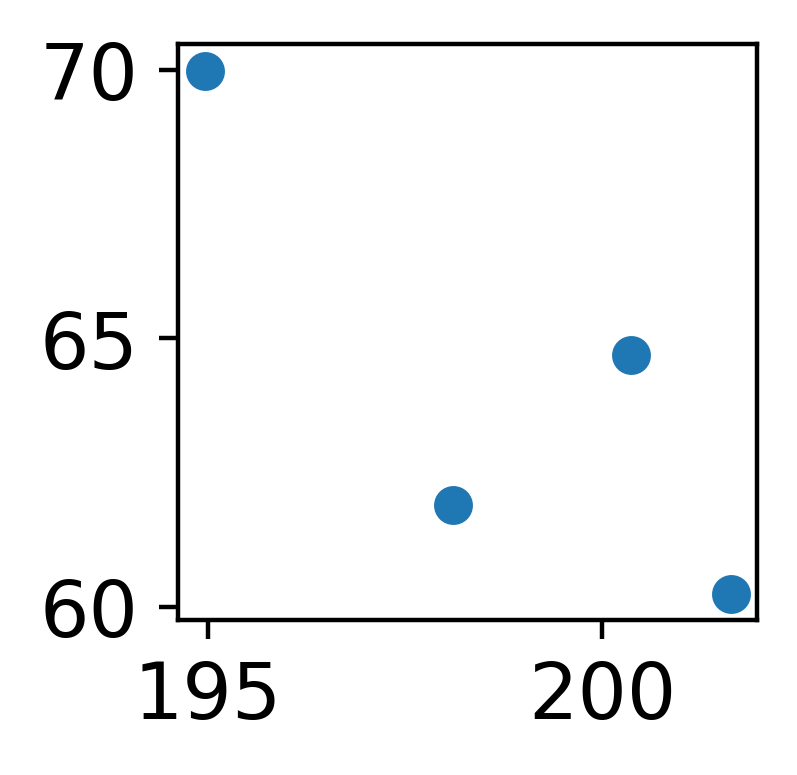

PyObject <matplotlib.collections.PathCollection object at 0x2aaaf3661550>

In [51]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=14)

fig, ax = plt.subplots(sharex=true,figsize=(0.5*3.74,0.5*3.74),dpi=400)

scatter(ustrip.([outflow_temp_control outflow_temp_homoRad outflow_temp_homoSfc outflow_temp_homoAll]),ustrip.([vmax_control vmax_homoRad vmax_homoSfc vmax_homoAll]))

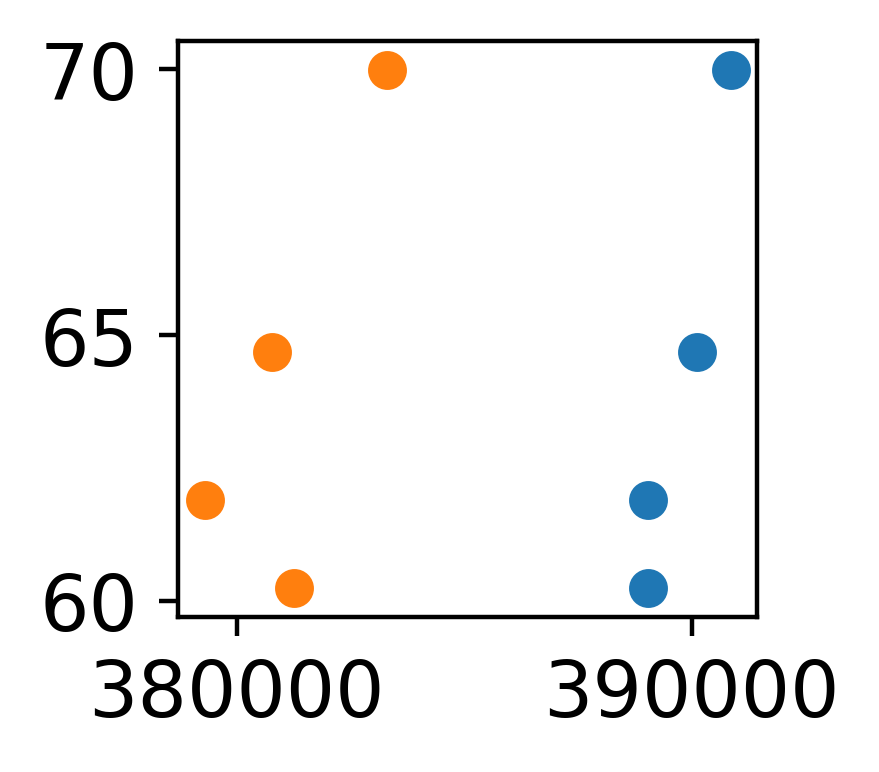

PyObject <matplotlib.collections.PathCollection object at 0x2aaca6d3bb50>

In [55]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=14)

fig, ax = plt.subplots(sharex=true,figsize=(0.5*3.74,0.5*3.74),dpi=400)

scatter(ustrip.([kstar_control kstar_homoRad kstar_homoSfc kstar_homoAll]),ustrip.([vmax_control vmax_homoRad vmax_homoSfc vmax_homoAll]))
scatter(ustrip.([kb_control kb_homoRad kb_homoSfc kb_homoAll]),ustrip.([vmax_control vmax_homoRad vmax_homoSfc vmax_homoAll]))

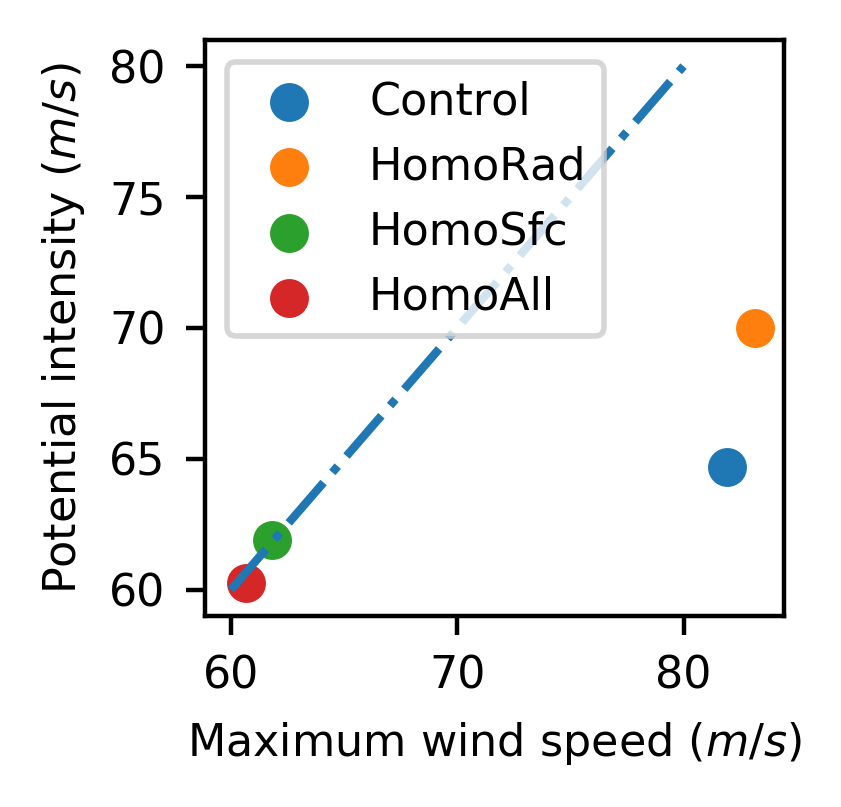

PyObject Text(0.5, 87.00000000000003, 'Maximum wind speed $(m/s)$')

In [63]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=8)

fig, ax = plt.subplots(figsize=(0.5*3.74,0.5*3.74),dpi=400)
plot([60, 80], [60, 80],"-.")
scatter([max_sp_control],[vmax_control], label = "Control")
scatter([max_sp_homoRad],[vmax_homoRad], label = "HomoRad")
scatter([max_sp_homoSfc],[vmax_homoSfc], label = "HomoSfc")
scatter([max_sp_homoAll],[vmax_homoAll], label = "HomoAll")
#        max_sp_homoRad max_sp_homoSfc max_sp_homoAll],ustrip.([vmax_control vmax_homoRad vmax_homoSfc vmax_homoAll]))
plt.legend()
ax.set_ylabel(string("Potential intensity ", L"(m/s)"))
ax.set_xlabel(string("Maximum wind speed ", L"(m/s)"))


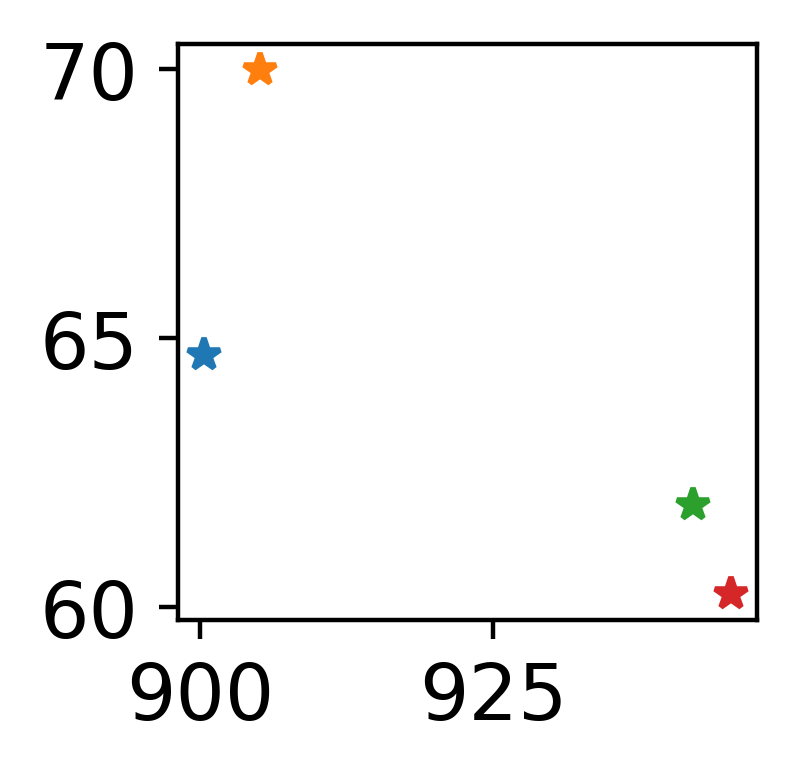

4-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x2aaca6a35b90>
 PyObject <matplotlib.lines.Line2D object at 0x2aaca67f14d0>
 PyObject <matplotlib.lines.Line2D object at 0x2aaca6a35f50>
 PyObject <matplotlib.lines.Line2D object at 0x2aaca6a35ed0>

In [46]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=14)

fig, ax = plt.subplots(sharex=true,figsize=(0.5*3.74,0.5*3.74),dpi=400)

plot([min_pres_control min_pres_homoRad min_pres_homoSfc min_pres_homoAll],ustrip.([vmax_control vmax_homoRad vmax_homoSfc vmax_homoAll]),"*")
